# 📊 Currency Clustering Analysis with KMeans

## 📌 Project Objective:
The goal of this project is to analyze the behavior of various currencies based on their daily exchange rates and identify groups (clusters) of currencies that show similar patterns over time.

## 🧩 Dataset:
- Source: [Dollar-Exchange.csv]
- Daily exchange rates of multiple foreign currencies against USD
- Contains missing values that were preprocessed and handled

## 🔧 Key Steps:
1. **Data Cleaning**: Removed currencies with excessive missing values
2. **Return Calculation**: Computed daily percentage change (returns) for each currency
3. **Standardization**: Applied z-score scaling to normalize the data
4. **Clustering**: Performed KMeans clustering to group similar currencies
5. **Visualization**:
   - Cluster count plot (Seaborn)

## 📈 Tools & Libraries:
- pandas, numpy
- sklearn (StandardScaler, KMeans)
- matplotlib, seaborn
- plotly (for interactive graphs)

## ✅ Outcomes:
- Grouped currencies based on return behavior

---

*This project was developed as part of a portfolio to demonstrate data analysis and unsupervised learning skills using real-world financial data.*

**Import Labraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

**Loading in the Data**

In [2]:
df = pd.read_csv("Dollar-Exchange.csv")

**Viewing the Data**

In [3]:
df.head()

Date  CNY=X  OMR=X   IRR=X  THB=X  SYP=X  MYR=X  YER=X    VND=X  ILS=X  \
0  1/1/2004    NaN   0.38     NaN  39.24    NaN   3.81    NaN      NaN   4.38   
1  1/2/2004   8.27   0.38  8236.2  39.53  47.23   3.80    NaN  15147.0   4.40   
2  1/5/2004   8.27   0.38  8731.5  39.26  47.25   3.80    NaN  15148.0   4.37   
3  1/6/2004   8.27   0.38  8724.7  39.03  47.21   3.80    NaN  15150.0   4.37   
4  1/7/2004   8.27   0.38  8728.7  38.97  47.22   3.81    NaN  15153.0   4.39   

   ...   LBP=X  TRY=X  TMT=X  SAR=X  MVR=X  QAR=X  MMK=X  NPR=X  BND=X  AFN=X  
0  ...     NaN    NaN    NaN   3.75    NaN   3.64    NaN    NaN   1.69    NaN  
1  ...  1474.1    NaN    NaN   3.75    NaN   3.64   6.18  70.60   1.68    NaN  
2  ...  1474.6    NaN    NaN   3.75    NaN   3.64   6.18  70.62   1.68    NaN  
3  ...  1473.8    NaN    NaN   3.75    NaN   3.64   6.18  70.58   1.68    NaN  
4  ...  1474.3    NaN    NaN   3.75    NaN   3.64   6.18  70.60   1.68    NaN  

[5 rows x 38 columns]

In [4]:
df.tail()

Date  CNY=X  OMR=X    IRR=X  THB=X  SYP=X  MYR=X   YER=X    VND=X  \
4951  12/26/2022   6.99   0.38  41300.0  34.61    NaN   4.42  249.85  23560.0   
4952  12/27/2022   6.96   0.38  41300.0  34.66    NaN   4.42  249.85  23590.0   
4953  12/28/2022   6.96   0.38  41400.0  34.62    NaN   4.42  250.00  23580.0   
4954  12/29/2022   6.98   0.38  41350.0  34.70    NaN   4.42  250.00  23620.0   
4955  12/30/2022   6.96   0.38  41350.0  34.58    NaN   4.42  250.00  23600.0   

      ILS=X  ...    LBP=X  TRY=X  TMT=X  SAR=X  MVR=X  QAR=X    MMK=X   NPR=X  \
4951   3.50  ...  1507.00  18.62   3.36   3.76  15.34   3.64  2079.01  130.90   
4952   3.49  ...  1506.00  18.66   3.36   3.76  15.34   3.64  2078.15  130.87   
4953   3.52  ...  1507.03  18.66   3.35   3.75  15.35   3.64  2080.14  131.02   
4954   3.54  ...  1507.00  18.69   3.35   3.75  15.35   3.64  2080.79  131.02   
4955   3.52  ...  1506.02  18.70   3.35   3.75  15.35   3.64  2079.26  130.82   

      BND=X  AFN=X  
4951   1.33   85.0  
4952   1.33   86.0  
4953   1.32   85.0  
4954   1.32   85.0  
4955   1.33   86.0  

[5 rows x 38 columns]

In [5]:
pd.set_option("display.max_columns", None)
df.head()

Date  CNY=X  OMR=X   IRR=X  THB=X  SYP=X  MYR=X  YER=X    VND=X  ILS=X  \
0  1/1/2004    NaN   0.38     NaN  39.24    NaN   3.81    NaN      NaN   4.38   
1  1/2/2004   8.27   0.38  8236.2  39.53  47.23   3.80    NaN  15147.0   4.40   
2  1/5/2004   8.27   0.38  8731.5  39.26  47.25   3.80    NaN  15148.0   4.37   
3  1/6/2004   8.27   0.38  8724.7  39.03  47.21   3.80    NaN  15150.0   4.37   
4  1/7/2004   8.27   0.38  8728.7  38.97  47.22   3.81    NaN  15153.0   4.39   

    JPY=X  LKR=X  IQD=X  PKR=X  KWD=X   KHR=X  UZS=X  SGD=X  INR=X  BDT=X  \
0  107.30  96.65    NaN  57.30   0.29     NaN    NaN    1.7  45.53    NaN   
1  106.91  97.04    0.3  57.10   0.29  3854.1    NaN    1.7  45.60  57.22   
2  106.24  97.25    0.3  57.10   0.29  3855.0    NaN    1.7  45.47  57.23   
3  106.23  97.50    0.3  57.10   0.29  3852.8    NaN    1.7  45.55  56.92   
4  106.18  97.50    0.3  57.35   0.29  3853.9    NaN    1.7  45.39  57.24   

   PHP=X  JOD=X   LAK=X   IDR=X   KRW=X   KZT=X  AED=X  BHD=X   LBP=X  TRY=X  \
0  55.24   0.71     NaN  8336.8  1181.6     NaN   3.67   0.38     NaN    NaN   
1  55.40   0.70  7645.7  8445.4  1195.8  168.48   3.67   0.38  1474.1    NaN   
2  55.29   0.71  7643.7  8369.8  1178.9  168.02   3.67   0.38  1474.6    NaN   
3  54.85   0.71  7639.0  8361.8  1189.4  167.55   3.67   0.38  1473.8    NaN   
4  54.91   0.71  7641.5  8369.3  1176.8  167.43   3.67   0.38  1474.3    NaN   

   TMT=X  SAR=X  MVR=X  QAR=X  MMK=X  NPR=X  BND=X  AFN=X  
0    NaN   3.75    NaN   3.64    NaN    NaN   1.69    NaN  
1    NaN   3.75    NaN   3.64   6.18  70.60   1.68    NaN  
2    NaN   3.75    NaN   3.64   6.18  70.62   1.68    NaN  
3    NaN   3.75    NaN   3.64   6.18  70.58   1.68    NaN  
4    NaN   3.75    NaN   3.64   6.18  70.60   1.68    NaN

In [6]:
df.tail()

Date  CNY=X  OMR=X    IRR=X  THB=X  SYP=X  MYR=X   YER=X    VND=X  \
4951  12/26/2022   6.99   0.38  41300.0  34.61    NaN   4.42  249.85  23560.0   
4952  12/27/2022   6.96   0.38  41300.0  34.66    NaN   4.42  249.85  23590.0   
4953  12/28/2022   6.96   0.38  41400.0  34.62    NaN   4.42  250.00  23580.0   
4954  12/29/2022   6.98   0.38  41350.0  34.70    NaN   4.42  250.00  23620.0   
4955  12/30/2022   6.96   0.38  41350.0  34.58    NaN   4.42  250.00  23600.0   

      ILS=X   JPY=X   LKR=X   IQD=X   PKR=X  KWD=X   KHR=X    UZS=X  SGD=X  \
4951   3.50  132.79  362.16  1459.0  225.00   0.31  4105.0  11200.0   1.35   
4952   3.49  132.76  362.01  1458.0  225.45   0.31  4104.0  11180.0   1.35   
4953   3.52  133.49  362.35  1459.0  225.75   0.31  4105.0  11150.0   1.35   
4954   3.54  134.03  362.47  1458.0  226.00   0.31  4107.0  11180.0   1.35   
4955   3.52  132.92  362.20  1459.0  226.00   0.31  4105.0  11200.0   1.34   

      INR=X   BDT=X  PHP=X  JOD=X    LAK=X    IDR=X    KRW=X   KZT=X  AED=X  \
4951  82.60  104.14  55.22   0.71  17320.0  15565.9  1279.24  458.88   3.67   
4952  82.90  104.12  55.17   0.71  17310.0  15607.0  1275.13  458.68   3.67   
4953  82.78  100.93  55.72   0.71  17300.0  15617.5  1272.28  457.92   3.67   
4954  82.85  104.42  56.14   0.71  17310.0  15789.0  1274.32  460.76   3.67   
4955  82.84  100.98  55.65   0.71  17320.0  15620.0  1260.26  458.72   3.67   

      BHD=X    LBP=X  TRY=X  TMT=X  SAR=X  MVR=X  QAR=X    MMK=X   NPR=X  \
4951   0.37  1507.00  18.62   3.36   3.76  15.34   3.64  2079.01  130.90   
4952   0.38  1506.00  18.66   3.36   3.76  15.34   3.64  2078.15  130.87   
4953   0.37  1507.03  18.66   3.35   3.75  15.35   3.64  2080.14  131.02   
4954   0.37  1507.00  18.69   3.35   3.75  15.35   3.64  2080.79  131.02   
4955   0.37  1506.02  18.70   3.35   3.75  15.35   3.64  2079.26  130.82   

      BND=X  AFN=X  
4951   1.33   85.0  
4952   1.33   86.0  
4953   1.32   85.0  
4954   1.32   85.0  
4955   1.33   86.0

CNY = Chinese Yuan  
OMR = Omani Rial  
IRR = Irani Rial  
THB = Thai Baht  
SYP = Syrian Pound  
MYR = Malaysian Ringgit  
YER = Yemeni Rial  
VND = Vietnamese Dong  
ILS = Israeli New Shekel  
JPY = Japanese Yen  
LKR = Sri Lanka Rupee  
IQD = Iraqi Dinar  
PKR = Pakistani Rupee  
KWD = Kuwaiti Dinar  
KHR = Cambodian Riel  
UZS = Uzbekistani SOM  
SGD = Singapore Dollar  
INR = Indian Rupee  
BDT = Bangladeshi Taka  
PHP = Philippine Peso  
JOD = Jordanian Dinar  
LAK = Lao Kip  
IDR = Indonesian Rupiah  
KRW = South Korean Won  
KZT = Kazakhstani Tenge  
AED = UAE Dirham  
BHD = Bahraini Dinar  
LBP = Lebanese Pound  
TRY = Turkish Lira  
TMT = Turkmenistani Manat  
SAR = Saudi Riyal  
MVR = Maldivian Rufiyaa  
QAR = Qatari Riyal  
MMK = Burmese Kyat  
NPR = Nepalese Rupee  
BND = Brunei Dollar  
AFN = Afghan Afghani  

In [7]:
df.describe().T

count          mean           std     min         25%        50%  \
CNY=X  4941.0      6.886448      0.647358    5.86      6.3800      6.780   
OMR=X  4946.0      0.379990      0.000817    0.37      0.3800      0.380   
IRR=X  4141.0  21800.876165  15063.854790   40.00   9113.0000  11169.000   
THB=X  4927.0     33.589533      3.105895   28.07     31.2700     32.750   
SYP=X  3247.0    148.981478    184.528112   41.02     46.9800     50.370   
MYR=X  4948.0      3.712427      0.450958    2.90      3.2700      3.750   
YER=X  4726.0    220.234922     27.434909    0.10    199.7500    214.750   
VND=X  4949.0  19962.675518   3036.422619   20.89  16525.0000  20912.000   
ILS=X  4926.0      3.780292      0.375456    3.08      3.5100      3.720   
JPY=X  4928.0    105.754261     13.616954   75.74     98.9275    108.275   
LKR=X  4921.0    142.562357     52.851444   95.75    109.1500    130.090   
IQD=X  4934.0   1226.346263    154.857527    0.30   1152.6250   1172.150   
PKR=X  4912.0    120.673516   1198.003929    2.00     78.5500     98.000   
KWD=X  4921.0      0.291268      0.010994    0.26      0.2800      0.290   
KHR=X  4912.0   3977.812531    221.321622    1.00   3935.6750   4000.000   
UZS=X  4594.0   4089.264151   3747.444719   83.00   1476.6000   2224.900   
SGD=X  4940.0      1.402587      0.128423    1.20      1.3300      1.370   
INR=X  4925.0     57.678780     12.300567   39.04     45.4500     59.260   
BDT=X  4943.0     74.810350      8.540463   56.82     67.5900     76.290   
PHP=X  4922.0     48.287306      4.449011   39.75     44.4200     48.100   
JOD=X  4952.0      0.707211      0.004521    0.69      0.7000      0.710   
LAK=X  4934.0   8751.273265   1594.895543   80.00   7980.0000   8301.000   
IDR=X  4928.0  11499.418070   2329.685947  888.11   9211.0750  11308.000   
KRW=X  4926.0   1117.417414    104.040821  886.68   1062.9000   1124.210   
KZT=X  4919.0    249.932342    108.355433  140.75    164.9300    179.260   
AED=X  4944.0      3.669988      0.000450    3.65      3.6700      3.670   
BHD=X  4944.0      0.372994      0.006563    0.13      0.3700      0.370   
LBP=X  4919.0   1489.697073     54.961968    0.88   1475.6950   1499.900   
TRY=X  4680.0      3.802132      3.820930    1.14      1.5100      2.085   
TMT=X  3419.0      3.177078      0.267509    2.08      2.8500      3.350   
SAR=X  4923.0      3.748661      0.008688    3.30      3.7500      3.750   
MVR=X  4550.0     14.314125      1.197709   12.00     12.6500     15.150   
QAR=X  4943.0      3.629749      0.040454    3.00      3.6400      3.640   
MMK=X  4935.0    743.274424    683.615046    6.05      6.3100    945.640   
NPR=X  4918.0     90.672349     19.755909   61.43     70.5600     93.580   
BND=X  4923.0      1.363914      0.170233    0.66      1.2900      1.350   
AFN=X  2935.0    127.300750   1677.829053   17.60     51.2800     67.520   

              75%       max  
CNY=X      7.0700      8.28  
OMR=X      0.3800      0.39  
IRR=X  42000.0000  90000.00  
THB=X     35.1500     42.10  
SYP=X     99.3700    514.00  
MYR=X      4.1400      4.75  
YER=X    249.7500    250.80  
VND=X  22675.0000  24871.00  
ILS=X      3.9400      4.73  
JPY=X    113.7425    150.18  
LKR=X    155.7700    366.54  
IQD=X   1264.1250   1578.00  
PKR=X    115.4000  84020.00  
KWD=X      0.3000      0.31  
KHR=X   4052.7500   4280.00  
UZS=X   8130.0000  11512.84  
SGD=X      1.4500      1.73  
INR=X     68.0500     83.00  
BDT=X     82.2600    104.68  
PHP=X     51.5900     59.22  
JOD=X      0.7100      0.71  
LAK=X   9240.0000  17330.00  
IDR=X  13856.1450  16504.80  
KRW=X   1169.8275   1571.40  
KZT=X    342.7850    521.49  
AED=X      3.6700      3.68  
BHD=X      0.3800      0.38  
LBP=X   1507.0000   1533.50  
TRY=X      4.7400     18.70  
TMT=X      3.4000      3.85  
SAR=X      3.7500      3.78  
MVR=X     15.2100     15.85  
QAR=X      3.6400      3.90  
MMK=X   1340.0000   2090.55  
NPR=X    107.3775    131.33  
BND=X      1.4300      1.71  
AFN=X    

**Assessing Missing Values**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4956 non-null   object 
 1   CNY=X   4941 non-null   float64
 2   OMR=X   4946 non-null   float64
 3   IRR=X   4141 non-null   float64
 4   THB=X   4927 non-null   float64
 5   SYP=X   3247 non-null   float64
 6   MYR=X   4948 non-null   float64
 7   YER=X   4726 non-null   float64
 8   VND=X   4949 non-null   float64
 9   ILS=X   4926 non-null   float64
 10  JPY=X   4928 non-null   float64
 11  LKR=X   4921 non-null   float64
 12  IQD=X   4934 non-null   float64
 13  PKR=X   4912 non-null   float64
 14  KWD=X   4921 non-null   float64
 15  KHR=X   4912 non-null   float64
 16  UZS=X   4594 non-null   float64
 17  SGD=X   4940 non-null   float64
 18  INR=X   4925 non-null   float64
 19  BDT=X   4943 non-null   float64
 20  PHP=X   4922 non-null   float64
 21  JOD=X   4952 non-null   float64
 22  

In [9]:
df.isnull().sum()

Date        0
CNY=X      15
OMR=X      10
IRR=X     815
THB=X      29
SYP=X    1709
MYR=X       8
YER=X     230
VND=X       7
ILS=X      30
JPY=X      28
LKR=X      35
IQD=X      22
PKR=X      44
KWD=X      35
KHR=X      44
UZS=X     362
SGD=X      16
INR=X      31
BDT=X      13
PHP=X      34
JOD=X       4
LAK=X      22
IDR=X      28
KRW=X      30
KZT=X      37
AED=X      12
BHD=X      12
LBP=X      37
TRY=X     276
TMT=X    1537
SAR=X      33
MVR=X     406
QAR=X      13
MMK=X      21
NPR=X      38
BND=X      33
AFN=X    2021
dtype: int64

In [10]:
df.duplicated().sum()

0

**Data Visualization**

In [11]:
mpl.rcParams["font.family"] = "Times New Roman"

<Axes: >

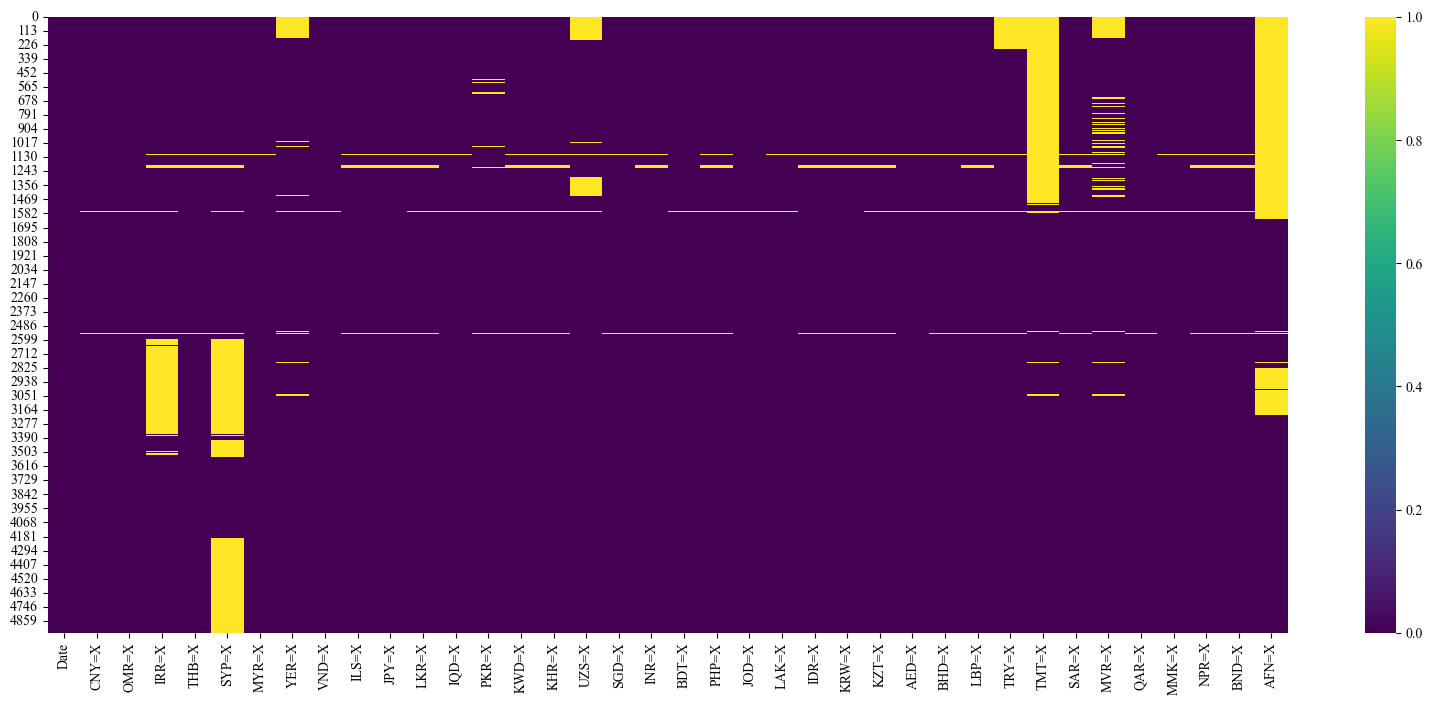

In [12]:
plt.figure(figsize= (20, 8))
sns.heatmap(data= df.isna(), cbar= True, cmap= "viridis")

In [13]:
df["Date"] = pd.to_datetime(df["Date"], errors= "coerce")

Text(0.5, 1.0, 'Correlation Matrix')

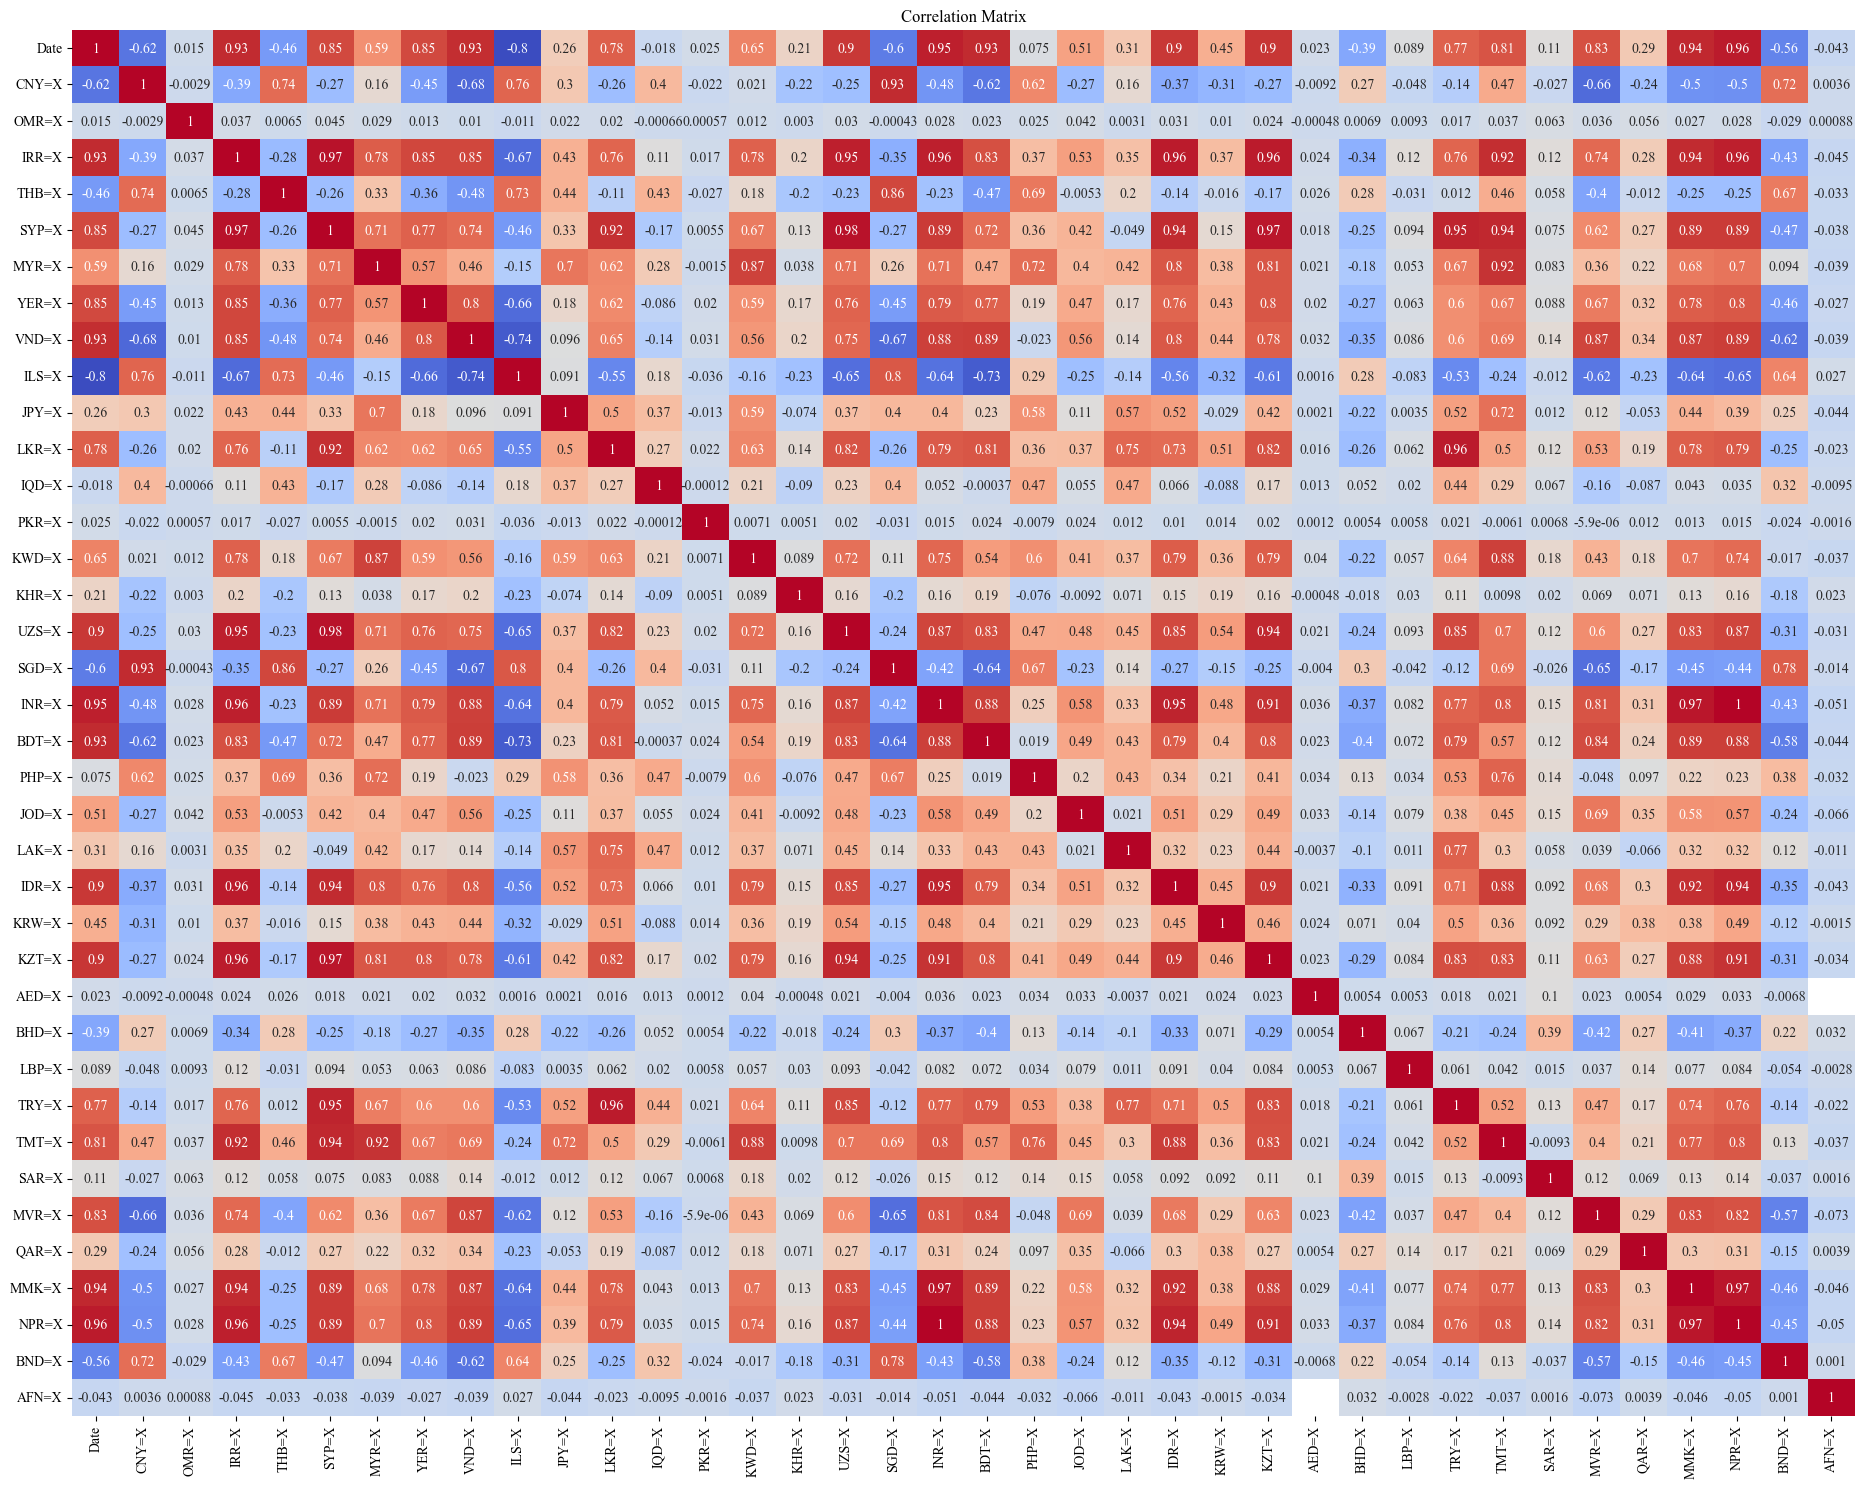

In [14]:
plt.figure(figsize= (23, 18))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot= True, cbar= False, cmap= "coolwarm")
plt.title("Correlation Matrix")

In [15]:
def Describe(df):

    out_put = pd.DataFrame({

        "column_name": df.columns,
        "dtype": [df[col].dtype for col in df.columns],
        "count": [df[col].count() for col in df.columns],
        "unique": [len(df[col].unique()) for col in df.columns],
        "missing_value": df.isna().sum() 
    })

    out_put = out_put.reset_index(drop= True)
    return out_put

In [16]:
Describe(df)

column_name           dtype  count  unique  missing_value
0         Date  datetime64[ns]   4956    4956              0
1        CNY=X         float64   4941     209             15
2        OMR=X         float64   4946       4             10
3        IRR=X         float64   4141    1950            815
4        THB=X         float64   4927    1104             29
5        SYP=X         float64   3247     847           1709
6        MYR=X         float64   4948     182              8
7        YER=X         float64   4726     253            230
8        VND=X         float64   4949    2423              7
9        ILS=X         float64   4926     167             30
10       JPY=X         float64   4928    2844             28
11       LKR=X         float64   4921    2904             35
12       IQD=X         float64   4934    1292             22
13       PKR=X         float64   4912    2190             44
14       KWD=X         float64   4921       7             35
15       KHR=X         float64   4912    2107             44
16       UZS=X         float64   4594    2706            362
17       SGD=X         float64   4940      55             16
18       INR=X         float64   4925    2379             31
19       BDT=X         float64   4943    1605             13
20       PHP=X         float64   4922    1458             34
21       JOD=X         float64   4952       4              4
22       LAK=X         float64   4934    3073             22
23       IDR=X         float64   4928    3943             28
24       KRW=X         float64   4926    3825             30
25       KZT=X         float64   4919    3404             37
26       AED=X         float64   4944       5             12
27       BHD=X         float64   4944       6             12
28       LBP=X         float64   4919    1050             37
29       TRY=X         float64   4680     802            276
30       TMT=X         float64   3419      31           1537
31       SAR=X         float64   4923      13             33
32       MVR=X         float64   4550      84            406
33       QAR=X         float64   4943      43             13
34       MMK=X         float64   4935    2468             21
35       NPR=X         float64   4918    2974             38
36       BND=X         float64   4923      75             33
37       AFN=X         float64   2935     980           2021

In [17]:
df.head()

Date  CNY=X  OMR=X   IRR=X  THB=X  SYP=X  MYR=X  YER=X    VND=X  \
0 2004-01-01    NaN   0.38     NaN  39.24    NaN   3.81    NaN      NaN   
1 2004-01-02   8.27   0.38  8236.2  39.53  47.23   3.80    NaN  15147.0   
2 2004-01-05   8.27   0.38  8731.5  39.26  47.25   3.80    NaN  15148.0   
3 2004-01-06   8.27   0.38  8724.7  39.03  47.21   3.80    NaN  15150.0   
4 2004-01-07   8.27   0.38  8728.7  38.97  47.22   3.81    NaN  15153.0   

   ILS=X   JPY=X  LKR=X  IQD=X  PKR=X  KWD=X   KHR=X  UZS=X  SGD=X  INR=X  \
0   4.38  107.30  96.65    NaN  57.30   0.29     NaN    NaN    1.7  45.53   
1   4.40  106.91  97.04    0.3  57.10   0.29  3854.1    NaN    1.7  45.60   
2   4.37  106.24  97.25    0.3  57.10   0.29  3855.0    NaN    1.7  45.47   
3   4.37  106.23  97.50    0.3  57.10   0.29  3852.8    NaN    1.7  45.55   
4   4.39  106.18  97.50    0.3  57.35   0.29  3853.9    NaN    1.7  45.39   

   BDT=X  PHP=X  JOD=X   LAK=X   IDR=X   KRW=X   KZT=X  AED=X  BHD=X   LBP=X  \
0    NaN  55.24   0.71     NaN  8336.8  1181.6     NaN   3.67   0.38     NaN   
1  57.22  55.40   0.70  7645.7  8445.4  1195.8  168.48   3.67   0.38  1474.1   
2  57.23  55.29   0.71  7643.7  8369.8  1178.9  168.02   3.67   0.38  1474.6   
3  56.92  54.85   0.71  7639.0  8361.8  1189.4  167.55   3.67   0.38  1473.8   
4  57.24  54.91   0.71  7641.5  8369.3  1176.8  167.43   3.67   0.38  1474.3   

   TRY=X  TMT=X  SAR=X  MVR=X  QAR=X  MMK=X  NPR=X  BND=X  AFN=X  
0    NaN    NaN   3.75    NaN   3.64    NaN    NaN   1.69    NaN  
1    NaN    NaN   3.75    NaN   3.64   6.18  70.60   1.68    NaN  
2    NaN    NaN   3.75    NaN   3.64   6.18  70.62   1.68    NaN  
3    NaN    NaN   3.75    NaN   3.64   6.18  70.58   1.68    NaN  
4    NaN    NaN   3.75    NaN   3.64   6.18  70.60   1.68    NaN

In [18]:
df.tail()

Date  CNY=X  OMR=X    IRR=X  THB=X  SYP=X  MYR=X   YER=X    VND=X  \
4951 2022-12-26   6.99   0.38  41300.0  34.61    NaN   4.42  249.85  23560.0   
4952 2022-12-27   6.96   0.38  41300.0  34.66    NaN   4.42  249.85  23590.0   
4953 2022-12-28   6.96   0.38  41400.0  34.62    NaN   4.42  250.00  23580.0   
4954 2022-12-29   6.98   0.38  41350.0  34.70    NaN   4.42  250.00  23620.0   
4955 2022-12-30   6.96   0.38  41350.0  34.58    NaN   4.42  250.00  23600.0   

      ILS=X   JPY=X   LKR=X   IQD=X   PKR=X  KWD=X   KHR=X    UZS=X  SGD=X  \
4951   3.50  132.79  362.16  1459.0  225.00   0.31  4105.0  11200.0   1.35   
4952   3.49  132.76  362.01  1458.0  225.45   0.31  4104.0  11180.0   1.35   
4953   3.52  133.49  362.35  1459.0  225.75   0.31  4105.0  11150.0   1.35   
4954   3.54  134.03  362.47  1458.0  226.00   0.31  4107.0  11180.0   1.35   
4955   3.52  132.92  362.20  1459.0  226.00   0.31  4105.0  11200.0   1.34   

      INR=X   BDT=X  PHP=X  JOD=X    LAK=X    IDR=X    KRW=X   KZT=X  AED=X  \
4951  82.60  104.14  55.22   0.71  17320.0  15565.9  1279.24  458.88   3.67   
4952  82.90  104.12  55.17   0.71  17310.0  15607.0  1275.13  458.68   3.67   
4953  82.78  100.93  55.72   0.71  17300.0  15617.5  1272.28  457.92   3.67   
4954  82.85  104.42  56.14   0.71  17310.0  15789.0  1274.32  460.76   3.67   
4955  82.84  100.98  55.65   0.71  17320.0  15620.0  1260.26  458.72   3.67   

      BHD=X    LBP=X  TRY=X  TMT=X  SAR=X  MVR=X  QAR=X    MMK=X   NPR=X  \
4951   0.37  1507.00  18.62   3.36   3.76  15.34   3.64  2079.01  130.90   
4952   0.38  1506.00  18.66   3.36   3.76  15.34   3.64  2078.15  130.87   
4953   0.37  1507.03  18.66   3.35   3.75  15.35   3.64  2080.14  131.02   
4954   0.37  1507.00  18.69   3.35   3.75  15.35   3.64  2080.79  131.02   
4955   0.37  1506.02  18.70   3.35   3.75  15.35   3.64  2079.26  130.82   

      BND=X  AFN=X  
4951   1.33   85.0  
4952   1.33   86.0  
4953   1.32   85.0  
4954   1.32   85.0  
4955   1.33   86.0

*KRW = South Korean Won*

In [19]:
df_KRW = df[["Date", "KRW=X"]]
df_KRW.isna().sum()

Date      0
KRW=X    30
dtype: int64

In [20]:
df_KRW.dropna(inplace= True)
df_KRW.head()

Date   KRW=X
0 2004-01-01  1181.6
1 2004-01-02  1195.8
2 2004-01-05  1178.9
3 2004-01-06  1189.4
4 2004-01-07  1176.8

In [21]:
plot = px.line(x= df_KRW["Date"], y= df_KRW["KRW=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs KRW",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/KRW",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= df_KRW["Date"].min(), x1= df_KRW["Date"].max(), xref= "paper", y0= 1440, y1= 1445, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= df_KRW["Date"].min(), x1= df_KRW["Date"].max(), xref= "paper", y0= 1060, y1= 1080, yref= "y"
)

*CNY = Chinese Yuan*

In [22]:
df_CNY = df[["Date", "CNY=X"]]
df_CNY.isna().sum()

Date      0
CNY=X    15
dtype: int64

In [23]:
df_CNY.dropna(inplace= True)
df_CNY.head()

Date  CNY=X
1 2004-01-02   8.27
2 2004-01-05   8.27
3 2004-01-06   8.27
4 2004-01-07   8.27
5 2004-01-08   8.27

In [24]:
plot = px.line(x= df_CNY["Date"], y= df_CNY["CNY=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs CNY",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/CNY",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0.52, x1= 1, xref= "paper", y0= 6.03, y1= 6.31, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0.52, x1= 1, xref= "paper", y0= 7, y1= 7.3, yref= "y"
)

*JPY = Japanese Yen*

In [25]:
df_JPY = df[["Date", "JPY=X"]]
df_JPY.isna().sum()

Date      0
JPY=X    28
dtype: int64

In [26]:
df_JPY.dropna(inplace= True)
df_JPY.head()

Date   JPY=X
0 2004-01-01  107.30
1 2004-01-02  106.91
2 2004-01-05  106.24
3 2004-01-06  106.23
4 2004-01-07  106.18

In [27]:
plot = px.line(x= df_JPY["Date"], y= df_JPY["JPY=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs JPY",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/JPY",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 120, y1= 150, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 52, y1= 106, yref= "y"
)

*THB = Thai Baht*

In [28]:
df_THB = df[["Date", "THB=X"]]
df_THB.isna().sum()

Date      0
THB=X    29
dtype: int64

In [29]:
df_THB.dropna(inplace= True)
df_THB.head()

Date  THB=X
0 2004-01-01  39.24
1 2004-01-02  39.53
2 2004-01-05  39.26
3 2004-01-06  39.03
4 2004-01-07  38.97

In [30]:
plot = px.line(x= df_THB["Date"], y= df_THB["THB=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs THB",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/THB",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 43, y1= 39, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 25, y1= 30, yref= "y"
)

*SYP = Syrian Pound*

In [31]:
df_SYP = df[["Date", "SYP=X"]]
df_SYP.isna().sum()

Date        0
SYP=X    1709
dtype: int64

In [32]:
df_SYP.dropna(inplace= True)
df_SYP.head()

Date  SYP=X
1 2004-01-02  47.23
2 2004-01-05  47.25
3 2004-01-06  47.21
4 2004-01-07  47.22
5 2004-01-08  47.14

In [33]:
plot = px.line(x= df_SYP["Date"], y= df_SYP["SYP=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs SYP",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/SYP",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

*MYR = Malaysian Ringgit*

In [34]:
df_MYR = df[["Date", "MYR=X"]]
df_MYR.isna().sum()

Date     0
MYR=X    8
dtype: int64

In [35]:
df_MYR.dropna(inplace= True)
df_MYR.head()

Date  MYR=X
0 2004-01-01   3.81
1 2004-01-02   3.80
2 2004-01-05   3.80
3 2004-01-06   3.80
4 2004-01-07   3.81

In [36]:
plot = px.line(x= df_MYR["Date"], y= df_MYR["MYR=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs MYR",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/MYR",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 4, y1= 4.8, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 2.3, y1= 3.5, yref= "y"
)

*VND = Vietnamese Dong*

In [37]:
df_VND = df[["Date", "VND=X"]]
df_VND.isna().sum()

Date     0
VND=X    7
dtype: int64

In [38]:
df_VND.dropna(inplace= True)
df_VND.head()

Date    VND=X
1 2004-01-02  15147.0
2 2004-01-05  15148.0
3 2004-01-06  15150.0
4 2004-01-07  15153.0
5 2004-01-08  15129.0

In [39]:
plot = px.line(x= df_VND["Date"], y= df_VND["VND=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs VND",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/VND",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

In [40]:
filtered_noise_VND = df_VND[df_VND["VND=X"] < 15000]
filtered_noise_VND

Date    VND=X
1634 2010-04-07   189.00
1905 2011-04-21    20.89
2482 2013-07-08    21.17
2657 2014-03-10    21.06
2694 2014-04-30  3210.00
2696 2014-05-02    21.00
2760 2014-07-31  3211.00

In [41]:
df_VND.drop(index= [1634, 1905, 2482, 2657, 2694, 2696, 2760], inplace= True)

In [42]:
plot = px.line(x= df_VND["Date"], y= df_VND["VND=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs VND",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/VND",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 13500, y1= 23000, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 18300, y1= 25000, yref= "y"
)

*LKR = Sri Lanka Rupee*

In [43]:
df_LKR = df[["Date", "LKR=X"]]
df_LKR.isna().sum()

Date      0
LKR=X    35
dtype: int64

In [44]:
df_LKR.dropna(inplace= True)
df_LKR.head()

Date  LKR=X
0 2004-01-01  96.65
1 2004-01-02  97.04
2 2004-01-05  97.25
3 2004-01-06  97.50
4 2004-01-07  97.50

In [45]:
plot = px.line(x= df_LKR["Date"], y= df_LKR["LKR=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs LKR",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/LKR",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 30, y1= 195, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 100, y1= 370, yref= "y"
)

*NPR = Nepalese Rupee*

In [46]:
df_NPR = df[["Date", "NPR=X"]]
df_NPR.isna().sum()

Date      0
NPR=X    38
dtype: int64

In [47]:
df_NPR.dropna(inplace= True)
df_NPR.head()

Date  NPR=X
1 2004-01-02  70.60
2 2004-01-05  70.62
3 2004-01-06  70.58
4 2004-01-07  70.60
5 2004-01-08  70.46

In [48]:
plot = px.line(x= df_NPR["Date"], y= df_NPR["NPR=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs NPR",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/NPR",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 88.5, y1= 132, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 36, y1= 120, yref= "y"
)

*INR = Indian Rupee*

In [49]:
df_INR = df[["Date", "INR=X"]]
df_INR.isna().sum()

Date      0
INR=X    31
dtype: int64

In [50]:
df_INR.dropna(inplace= True)
df_INR.head()

Date  INR=X
0 2004-01-01  45.53
1 2004-01-02  45.60
2 2004-01-05  45.47
3 2004-01-06  45.55
4 2004-01-07  45.39

In [51]:
plot = px.line(x= df_INR["Date"], y= df_INR["INR=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs INR",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/INR",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 55, y1= 83, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 20, y1= 74.6, yref= "y"
)

*OMR = Omani Rial*

In [52]:
df_OMR = df[["Date", "OMR=X"]]
df_OMR.isna().sum()

Date      0
OMR=X    10
dtype: int64

In [53]:
df_OMR.dropna(inplace= True)
df_OMR.head()

Date  OMR=X
0 2004-01-01   0.38
1 2004-01-02   0.38
2 2004-01-05   0.38
3 2004-01-06   0.38
4 2004-01-07   0.38

In [54]:
plot = px.line(x= df_OMR["Date"], y= df_OMR["OMR=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs OMR",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/OMR",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 0.39, y1= 0.39, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 0.37, y1= 0.37, yref= "y"
)

*IRR = Irani Rial*

In [55]:
df_IRR = df[["Date", "IRR=X"]]
df_IRR.isna().sum()

Date       0
IRR=X    815
dtype: int64

In [56]:
df_IRR.dropna(inplace= True)
df_IRR.head()

Date   IRR=X
1 2004-01-02  8236.2
2 2004-01-05  8731.5
3 2004-01-06  8724.7
4 2004-01-07  8728.7
5 2004-01-08  8217.8

In [57]:
plot = px.line(x= df_IRR["Date"], y= df_IRR["IRR=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs IRR",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/IRR",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

In [58]:
filtered_noise_IRR_low = df_IRR[df_IRR["IRR=X"] < 8000]
filtered_noise_IRR_low

Date   IRR=X
1848 2011-02-01    40.0
2158 2012-04-10  1255.0

In [59]:
filtered_noise_IRR_high = df_IRR[df_IRR["IRR=X"] > 50000]
filtered_noise_IRR_high

Date    IRR=X
4302 2020-06-30  90000.0
4303 2020-07-01  90000.0
4304 2020-07-02  90000.0
4305 2020-07-03  90000.0
4307 2020-07-07  90000.0
4308 2020-07-08  90000.0

In [60]:
df_IRR.drop(index= [1848, 2158, 4302, 4303, 4304, 4305, 4307, 4308], inplace= True)

In [61]:
plot = px.line(x= df_IRR["Date"], y= df_IRR["IRR=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs IRR",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/IRR",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

*YER = Yemenei Rial*

In [62]:
df_YER = df[["Date", "YER=X"]]
df_YER.isna().sum()

Date       0
YER=X    230
dtype: int64

In [63]:
df_YER.dropna(inplace= True)
df_YER.head()

Date   YER=X
168 2004-08-24  184.79
169 2004-08-25  184.79
170 2004-08-26  184.82
171 2004-08-27  184.82
172 2004-08-30  184.85

In [64]:
plot = px.line(x= df_YER["Date"], y= df_YER["YER=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs YER",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/YER",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

In [65]:
filtered_noise_YER = df_YER[df_YER["YER=X"] < 174]
filtered_noise_YER

Date  YER=X
998  2007-10-30  98.15
1744 2010-09-08   2.14
1745 2010-09-09   2.14
1746 2010-09-10   2.14
1747 2010-09-13   2.14
1748 2010-09-14   2.14
1749 2010-09-15   2.14
2359 2013-01-16   0.80
2360 2013-01-17   0.80
2487 2013-07-15   3.67
2608 2013-12-31  24.78
2609 2014-01-01  24.78
2700 2014-05-08  24.00
2714 2014-05-28   1.00
3315 2016-09-15   0.10

In [66]:
df_YER.drop(index= [998, 1744, 1745, 1746, 1747, 1748, 1749, 2359, 2360, 2487, 2608, 2609, 2700, 2714, 3315], inplace= True)

In [67]:
plot = px.line(x= df_YER["Date"], y= df_YER["YER=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs YER",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/YER",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

*IQD = Iraqi Dinar*

In [68]:
df_IQD = df[["Date", "IQD=X"]]
df_IQD.isna().sum()

Date      0
IQD=X    22
dtype: int64

In [69]:
df_IQD.dropna(inplace= True)
df_IQD.head()

Date  IQD=X
1 2004-01-02    0.3
2 2004-01-05    0.3
3 2004-01-06    0.3
4 2004-01-07    0.3
5 2004-01-08    0.3

In [70]:
plot = px.line(x= df_IQD["Date"], y= df_IQD["IQD=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs IQD",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/IQD",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

In [71]:
filtered_noise_IQD_low = df_IQD[df_IQD["IQD=X"] < 1050]
filtered_noise_IQD_low

Date    IQD=X
1    2004-01-02     0.30
2    2004-01-05     0.30
3    2004-01-06     0.30
4    2004-01-07     0.30
5    2004-01-08     0.30
6    2004-01-09     0.30
7    2004-01-12     0.30
8    2004-01-13     0.30
9    2004-01-14     0.30
10   2004-01-15     0.30
11   2004-01-16     0.30
12   2004-01-19     0.30
13   2004-01-20     0.30
14   2004-01-21   849.01
15   2004-01-22   849.92
16   2004-01-23   850.92
17   2004-01-26   850.26
18   2004-01-27   999.15
19   2004-01-28  1000.30
20   2004-01-29  1000.20
21   2004-01-30   998.58
22   2004-02-02   998.66
23   2004-02-03  1000.00
24   2004-02-04  1000.00
25   2004-02-05   999.47
26   2004-02-06   999.87
27   2004-02-09  1004.20
28   2004-02-10   999.36
29   2004-02-11   999.40
1644 2010-04-21    11.63
1708 2010-07-20    11.00
1715 2010-07-29    11.00
1778 2010-10-26    11.00
1878 2011-03-15   165.00
2614 2014-01-08    11.64
2620 2014-01-16    11.63
2643 2014-02-18    11.64
2667 2014-03-24   116.00
2671 2014-03-28   116.00
2690 2014-04-24   111.00
2692 2014-04-28    10.00
2864 2014-12-24    11.00
2968 2015-05-19   111.00
3208 2016-04-19    11.80
3698 2018-03-06    11.74
3964 2019-03-13   116.00

In [72]:
filtered_noise_IQD_high = df_IQD[df_IQD["IQD=X"] > 1470]
filtered_noise_IQD_high

Date   IQD=X
251  2004-12-17  1472.6
266  2005-01-07  1479.7
3233 2016-05-24  1578.0

In [73]:
df_IQD.drop(index= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                    1644, 1708, 1715, 1778, 1878, 2614, 2620, 2643, 2667, 2671, 2690, 2692, 2864, 2968, 3208, 3698, 3964, 
                    251, 266, 3233], inplace= True)

In [74]:
plot = px.line(x= df_IQD["Date"], y= df_IQD["IQD=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs IQD",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/IQD",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 1050, y1= 1050, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 1470, y1= 1470, yref= "y"
)

*KWD = Kuwaiti Dinar*

In [75]:
df_KWD = df[["Date", "KWD=X"]]
df_KWD.isna().sum()

Date      0
KWD=X    35
dtype: int64

In [76]:
df_KWD.dropna(inplace= True)
df_KWD.head()

Date  KWD=X
0 2004-01-01   0.29
1 2004-01-02   0.29
2 2004-01-05   0.29
3 2004-01-06   0.29
4 2004-01-07   0.29

In [77]:
plot = px.line(x= df_KWD["Date"], y= df_KWD["KWD=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs KWD",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/KWD",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 0.31, y1= 0.31, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 0.245, y1= 0.3, yref= "y"
)

*BHD = Bahraini Dinar*

In [78]:
df_BHD = df[["Date", "BHD=X"]]
df_BHD.isna().sum()

Date      0
BHD=X    12
dtype: int64

In [79]:
df_BHD.dropna(inplace= True)
df_BHD.head()

Date  BHD=X
0 2004-01-01   0.38
1 2004-01-02   0.38
2 2004-01-05   0.38
3 2004-01-06   0.38
4 2004-01-07   0.38

In [80]:
plot = px.line(x= df_BHD["Date"], y= df_BHD["BHD=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs BHD",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/BHD",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

In [81]:
filtered_noise_BHD = df_BHD[df_BHD["BHD=X"] < 0.35]
filtered_noise_BHD

Date  BHD=X
3360 2016-11-17   0.30
3373 2016-12-06   0.13

In [82]:
df_BHD.drop(index= [3360, 3373], inplace= True)

In [83]:
plot = px.line(x= df_BHD["Date"], y= df_BHD["BHD=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs BHD",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/BHD",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 0.38, y1= 0.38, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 0.36, y1= 0.36, yref= "y"
)

*SAR = Saudi Riyal*

In [84]:
df_SAR = df[["Date", "SAR=X"]]
df_SAR.isna().sum()

Date      0
SAR=X    33
dtype: int64

In [85]:
df_SAR.dropna(inplace= True)
df_SAR.head()

Date  SAR=X
0 2004-01-01   3.75
1 2004-01-02   3.75
2 2004-01-05   3.75
3 2004-01-06   3.75
4 2004-01-07   3.75

In [86]:
plot = px.line(x= df_SAR["Date"], y= df_SAR["SAR=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs SAR",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/SAR",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

In [87]:
filtered_noise_SAR = df_SAR[df_SAR["SAR=X"] < 3.68]
filtered_noise_SAR

Date  SAR=X
2337 2012-12-17   3.67
3373 2016-12-06   3.30

In [88]:
df_SAR.drop(index= [2337, 3373], inplace= True)

In [89]:
plot = px.line(x= df_SAR["Date"], y= df_SAR["SAR=X"])

plot.update_traces(line_color= "blue", line_width= 2)

plot.update_layout(
    plot_bgcolor= "gray",
    title= "Dollar vs SAR",
    title_x= 0.5,
    xaxis_title= "Date",
    yaxis_title= "Dollar/SAR",
    font_color= "navy",
    font_family= "Times New Roman",
    font_size= 18,
    title_font_color= "navy",
    title_font_family= "Times New Roman",
    title_font_size= 22
)

plot.update_xaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")
plot.update_yaxes(mirror= True, ticks= "outside", showline= True, linecolor= "white", gridcolor= "lightgray")

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 3.78, y1= 3.78, yref= "y"
)

plot.add_shape(
    type= "line", line_color= "snow", line_width= 3, opacity= 1, line_dash= "dashdot", x0= 0, x1= 1, xref= "paper", y0= 3.68, y1= 3.68, yref= "y"
)

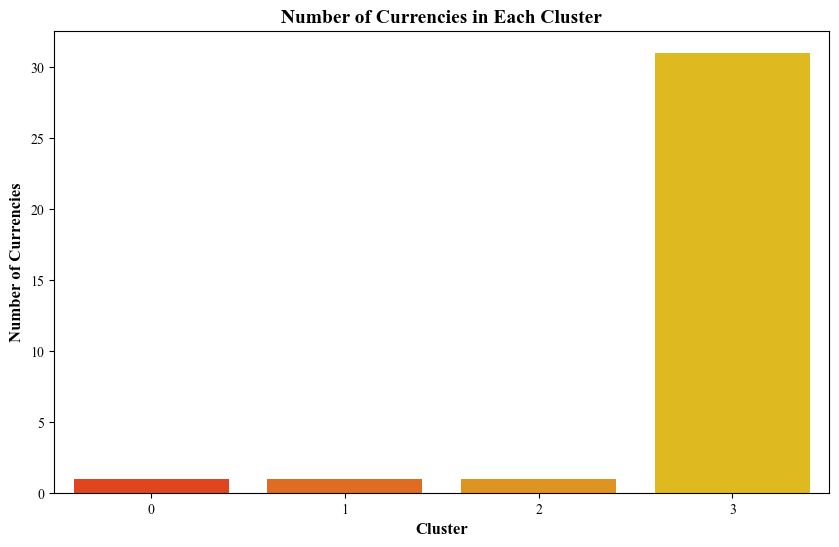

Cluster                                           Currency
0        0                                            [KWD=X]
1        1                                            [NPR=X]
2        2                                            [THB=X]
3        3  [CNY=X, OMR=X, IRR=X, MYR=X, YER=X, VND=X, ILS...

In [90]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_copy = df.copy()
df_copy["Date"] = pd.to_datetime(df_copy["Date"])
df_copy.set_index("Date", inplace=  True)

df_clean = df_copy.dropna(axis= 1, thresh= len(df_copy) * 0.8)

returns = df_clean.pct_change().dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(returns.T)

kmeans = KMeans(n_clusters= 4, random_state= 42, n_init= "auto")
clusters = kmeans.fit_predict(scaled_data)

currency_clusters = pd.DataFrame({
    "Currency": returns.columns,
    "Cluster": clusters
})

grouped_clusters = currency_clusters.groupby("Cluster")["Currency"].apply(list).reset_index()

plt.figure(figsize= (10, 6))
sns.countplot(data= currency_clusters, x= "Cluster", palette= "autumn")
plt.title("Number of Currencies in Each Cluster", fontsize= 14, fontweight= "bold")
plt.xlabel("Cluster", fontsize= 12, fontweight= "bold")
plt.ylabel("Number of Currencies", fontsize= 12, fontweight= "bold")
plt.show()

grouped_clusters

## 📌 Conclusion

This project demonstrates a practical application of unsupervised learning to financial time-series data. By analyzing the daily returns of various currencies and clustering them using KMeans, we were able to identify groups of currencies with similar market behavior.

### Key Takeaways:
- Currencies with similar economic or regional backgrounds tend to fall into the same cluster.
- Preprocessing and standardization significantly impact clustering outcomes.
- Interactive Plotly graphs provide better insights and presentation value.

The results can be useful for financial analysts, investors, or researchers interested in identifying currency groups that react similarly to market conditions. This analysis could be extended further with more features (e.g., macroeconomic indicators) or by testing other clustering algorithms (e.g., DBSCAN, Hierarchical Clustering).

---

*Project completed as part of portfolio development. Feedback is welcome.*